In [2]:
import requests
from bs4 import BeautifulSoup as Soup
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub'
response = requests.get(url)


print(response.text)
soup = Soup(response.text, 'html.parser')

tables = soup.find_all('table')
print(len(tables))

msg_table = tables[0]
rows = msg_table.find_all('tr')

<!DOCTYPE html><html><head><title>Coding assessment input data example</title><link rel="shortcut icon" href="https://ssl.gstatic.com/docs/documents/images/kix-favicon-2023q4.ico"><meta name="referrer" content="origin"><script nonce="S3ib0nwZ9vD_D1u9LwDFiQ">
        var DOCS_timing = {};
        var DOCS_drawing_load = {};
        var DOCS_drawing_decode = {};

        function _DOCS_record_fn(id) {
          if (window.performance && window.performance.now) {
            DOCS_drawing_load[id] = performance.now();
            const imgEl = document.getElementById(id);
            if (imgEl && imgEl.decode) {
              imgEl.decode().then(() => {
                DOCS_drawing_decode[id] = performance.now();
                if (typeof DOCS_notifyDrawingDecode === 'function') {
                  DOCS_notifyDrawingDecode(id);
                }
              });
            }
          }

          if (typeof DOCS_notifyDrawingLoad === 'function') {
            DOCS_notifyDrawingLoad(id)

In [10]:
header_row = rows[0]
first_row = rows[1]
first_row.find_all('td')
[str(x.string) for x in first_row.find_all('td')]

['0', '█', '0']

In [12]:
def parse_row(row):
    return [str(x.string) for x in row.find_all('td')]
parsed_row_list = [parse_row(row) for row in rows[1:]]
print(parsed_row_list)

[['0', '█', '0'], ['0', '█', '1'], ['0', '█', '2'], ['1', '▀', '1'], ['1', '▀', '2'], ['2', '▀', '1'], ['2', '▀', '2'], ['3', '▀', '2']]


In [14]:
df = DataFrame(parsed_row_list)
df.columns = [str(x.string) for x in rows[0].find_all('td')]
df.head(10)

,x-coordinate,Character,y-coordinate
0,0,█,0
1,0,█,1
2,0,█,2
3,1,▀,1
4,1,▀,2
5,2,▀,1
6,2,▀,2
7,3,▀,2


In [16]:
num_columns = ['x-coordinate', 'y-coordinate']
df[num_columns] = df[num_columns].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   x-coordinate  8 non-null      int64 
 1   Character     8 non-null      object
 2   y-coordinate  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes


In [18]:
print(df.index)
print(df['x-coordinate'].value_counts())
print(df['y-coordinate'].max())

RangeIndex(start=0, stop=8, step=1)
x-coordinate
0    3
1    2
2    2
3    1
Name: count, dtype: int64
2


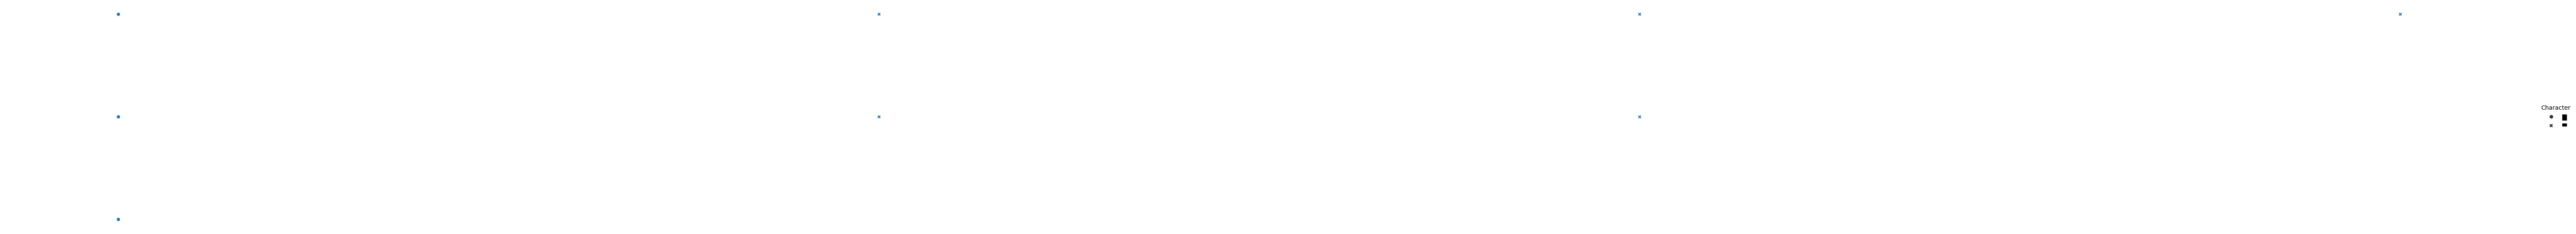

In [21]:
msg = sns.relplot(data=df, x='x-coordinate', y='y-coordinate', kind='scatter', style='Character', height=6, aspect=10)
msg.set(xticks=[], yticks=[], xlabel=None, ylabel=None)
msg.despine(left=True, bottom=True)

In [24]:
def secretmsg_decoder(url):
    response = requests.get(url)
    soup = Soup(response.text, 'html.parser')
    tables = soup.find_all('table')
    len(tables)

    msg_table = tables[0]
    rows = msg_table.find_all('tr')
    def parse_row(row):
        return [str(x.string) for x in row.find_all('td')]
    parsed_rows_list = [parse_row(row) for row in rows[1:]]
    df = DataFrame(parsed_rows_list)
    df.columns = [str(x.string) for x in rows[0].find_all('td')]
    num_columns = ['x-coordinate', 'y-coordinate']
    df[num_columns] = df[num_columns].apply(pd.to_numeric)
    msg = sns.relplot(data=df, x='x-coordinate', y='y-coordinate', kind='scatter', style='Character', height=6, aspect=10)
    msg.set(xticks=[], yticks=[], xlabel=None, ylabel=None)
    msg.despine(left=True, bottom=True)
    return msg

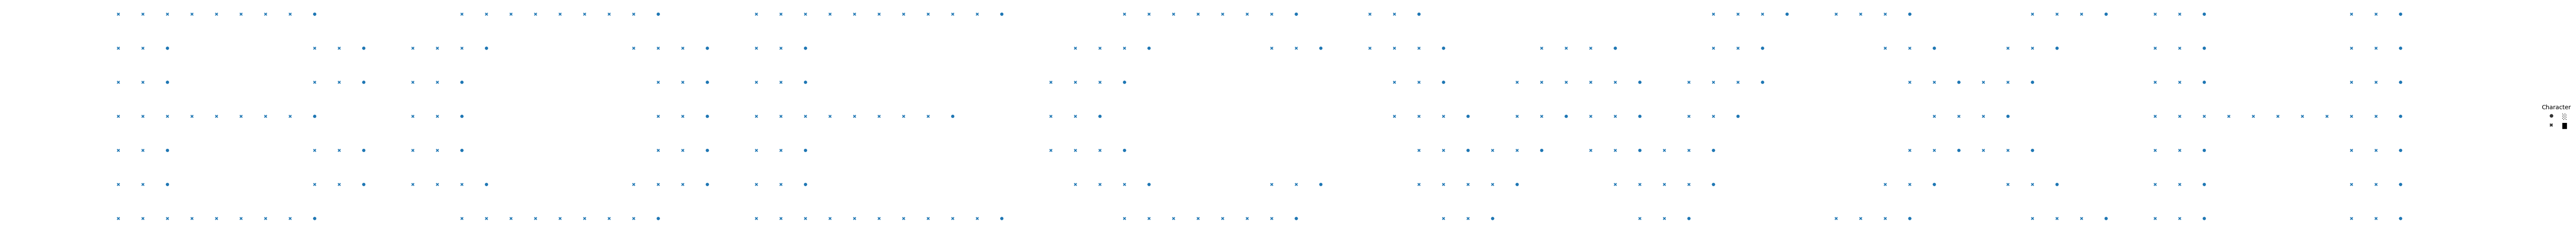

In [26]:
url = 'https://docs.google.com/document/d/e/2PACX-1vQGUck9HIFCyezsrBSnmENk5ieJuYwpt7YHYEzeNJkIb9OSDdx-ov2nRNReKQyey-cwJOoEKUhLmN9z/pub'
secretmsg_decoder(url)